# librairies utilisées

In [1]:
import pandas as pd
import numpy as  np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

L'**ACP** est une technique de machine learning d'**apprentissage non supervisée**. Elle tire avantage de la variance des variables plus précisément de la corrélation entre elles en éliminant la redondance de l’information contenue dans les variables. Il faut faire attention à ce niveau, l’ACP ne permet pas d’éliminer des variables ! Elle opère à travers un procédé mathématique qui transforme un nombre important de variables qui sont probablement corrélées en un nombre inférieur de variables non corrélées appelées Composant Principal, du fait de leur caractère à absorber le maximum d’information ou de variance dans les variables de départ.  

En résumé, l'analyse en composantes princales permet :  

* d'identifier des "profils cachés" dans un jeu de données,  

* de réduire les dimensions des données en enlevant la redondance des données,  

* d'indentifier les variables corrélées

Concrètement, pour **p dimensions ou variables**, nous avons **p composants principaux** obéissant au principes suivants :

* La première composante principale, est une combinaison linéaire des variables d'origine, qui maximise la variance dans les données. Géométriquement parlant, cette dernière détermine le sens de variation maximale dans les données. En bref, c’est la composante principale qui absorbe le maximum d’information.

* La seconde composante principale est également une combinaison linéaire des variables d'origine, qui maximise la variance avec la condition de **non-corrélation** avec le précédent composant principal.

* Le reste des composantes, obéit à la règle de la second composante principale.

# Formalisation 
Considérons $X$, la matrice des données numériques de dimension $n \times p$, de moyenne $\mu$ et de variance ou covariance $\Sigma$, dans laquelle, chaque individu $e_{i}$ est décrit par les variables numériques $X_{1},X_{2},...,X_{p}$.

On appelle composante principale $Z_{i}$, la combinaison linéaire des variables qui s'exprime comme ceci : 
$$
Z_{i} = w_{i1}X_{1}+w_{i2}X_{2}+...+w_{ip}X_{p}
      = W^{T}_{i}X_{i}
$$
  
  avec comme variance $\sigma^{2}(z)_{i}= W^{T}_{i}\Sigma W_{i}$ et $W_{i}$ esr un vecteur de $p$ constantes.  
  
  Nous devons trouver $W_{i}$ et en suite $Z_{i}$, telle que $\sigma^{2}(z)_{i}$ soit maximale avec $|sum^{p}_{j}w^{2}_{ij}=1$ ou $W^{T}_{i}W^{i}=1$ (cette contrainte est introduite pour éviter que $W_{i}\rightarrow\infty$)  
  
  * Pour la première composante principal $Z_{1}$, nous devons résoudre : $$
\left\{
    \begin{array}{lc}
        Max & \sigma^{2}(z)_{1}=W_{1}^{T}\Sigma W_{1}\\
        \mbox{sc.(sous contrainte) de } & W^{T}_{1}W_{1}=1
    \end{array}
\right.
$$  
     En utilisant le multiplicateur de Lagrange on obtient que : $$\Sigma W_{1}=\lambda_{1}W_{1}$$

* Pour la seconde composante principal $Z_{2}$, nous avons à résoudre : 
$$
\left\{
    \begin{array}{lc}
        Max & \sigma^{2}(z)_{2}=W_{2}^{T}\Sigma W_{2}\\
        \mbox{sc.(sous contrainte) de } & W^{T}_{2}W_{2}=1\\
        & W^{T}_{2}W_{1}=0
    \end{array}
\right.
$$ 
    En utilisant le multiplicateur de Lagrange on obtient que : $$\Sigma W_{2}=\lambda_{2}W_{2}$$ 
    
* Pour le reste des composantes principaux, on utilise le problème de la seconde composante en incrémentant pour $i$ allant de 3 à $p$ composantes principal. On obtiendra de manière générale que : $$\Sigma W_{i}=\lambda_{i}W_{i}$$

**Remarque :**  
La première remarque que l’on fait c’est que pour que les équations de la forme $\Sigma W_{i}=\lambda_{i}W_{i}$ soient possibles, il faudrait que les vecteurs $W_{i}$ et les valeurs $\lambda_{i}$ soient respectivement des vecteurs et valeurs propres de $\Sigma$. Mieux encore on peut donc conclure que : 

$$\sigma^{2}(z)_{i}=Var[W_{i}^{T}X] = W_{i}^{T}\Sigma W_{i} = \lambda_{i}$$

 Autrement dit, la variance d’une  composante principale est égale à la valeur propre de la matrice de variance – covariance $\Sigma$.


## Critère de rétention d’un composant principal
Une fois, nos composants déterminer, nous devons retenir ceux ayant des variances importantes et ignorer ceux ayant de faibles variances. Pour ce faire on peut se baser sur les critères suivantes( ce ne sont pas des lois) :  

* Retenir les k composants ayant une valeur propre supérieure à 1 (Critère de Kaiser – Guttman)

* Retenir les k composants dont les valeurs propres précédent la cassure de la courbe on parle aussi du coude

* Retenir les k premiers composants qui expliquent y% de la variance.

* Retenir les k premiers composants dont la part ou proportion de variance est supérieur à la moyenne $( y>\frac{1}{p})$
 
# L'ACP ou PCA avec le jeu de données BigMac

In [2]:
mcdo = pd.read_csv("../BigMac2003.csv",sep=",")
print(type(mcdo))
mcdo.head()
mcdo.tail()

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,BigMac,Bread,Rice,FoodIndex,Bus,Apt,TeachGI,TeachNI,TaxRate,TeachHours
64,Tokyo,10,20,18,129.4,1.64,1010,45.8,38.3,16.3755,49
65,Toronto,14,12,10,61.0,1.31,850,26.5,18.5,30.1887,49
66,Vienna,15,13,10,76.4,1.70,1020,28.9,19.8,31.4879,37
67,Vilnius,62,25,23,33.8,0.24,340,3.7,2.6,29.7297,32
68,Warsaw,44,17,16,36.0,0.62,440,5.3,3.4,35.8491,26


In [3]:
#nombre d'observations
n = mcdo.shape[0]
#nombre de variables quantitatives
p = mcdo.shape[1]-1

mcdo.shape

(69, 11)

In [4]:
# Type des variables
print(mcdo.dtypes)

Unnamed: 0     object
BigMac          int64
Bread           int64
Rice            int64
FoodIndex     float64
Bus           float64
Apt             int64
TeachGI       float64
TeachNI       float64
TaxRate       float64
TeachHours      int64
dtype: object


Notre jeu de données comporte 69 observations pour 11 variables.  
On renomme la variable *Unamed:0* en *City* : 

In [5]:
mcdo = mcdo.rename(columns={mcdo.columns[0]:"City"})
mcdo.head()
mcdo.index = mcdo["City"]
mcdo = mcdo.drop(columns="City")

Ensuite nous allons avec la fonction **_describe()_**  obtenir une description statistique des données, nous avons les principaux indicateurs de tendance centrale et de dispersion :

In [6]:
mcdo.describe()

,BigMac,Bread,Rice,FoodIndex,Bus,Apt,TeachGI,TeachNI,TaxRate,TeachHours
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,37.275362,24.579710,19.942029,61.930435,1.041159,713.913043,21.220290,15.778261,21.481858,36.739130
std,31.420714,17.807307,15.236261,24.585477,0.801046,461.841638,19.205028,14.076262,10.296695,7.417492
min,10.000000,6.000000,5.000000,23.500000,0.090000,90.000000,0.600000,0.500000,-7.317070,20.000000
25%,16.000000,13.000000,12.000000,41.200000,0.360000,320.000000,4.100000,3.400000,15.000000,33.000000
50%,25.000000,19.000000,16.000000,62.600000,0.830000,700.000000,17.800000,12.600000,21.739100,38.000000
75%,48.000000,28.000000,22.000000,75.300000,1.490000,950.000000,32.300000,22.500000,28.806600,40.000000
max,185.000000,90.000000,96.000000,129.400000,3.700000,1930.000000,78.500000,57.600000,42.352900,58.000000


Pour la visualisation graphique compte tenu du nombre de variables, les projeter individuellement nous donnerait un travail de longue haleine. Heureusement, avec la fonction PairGrid() de la librairie seaborn nous pouvons faire une analyse graphique des variables prises deux à deux et même visualiser la distribution de ces dernières.


/home/djebali/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


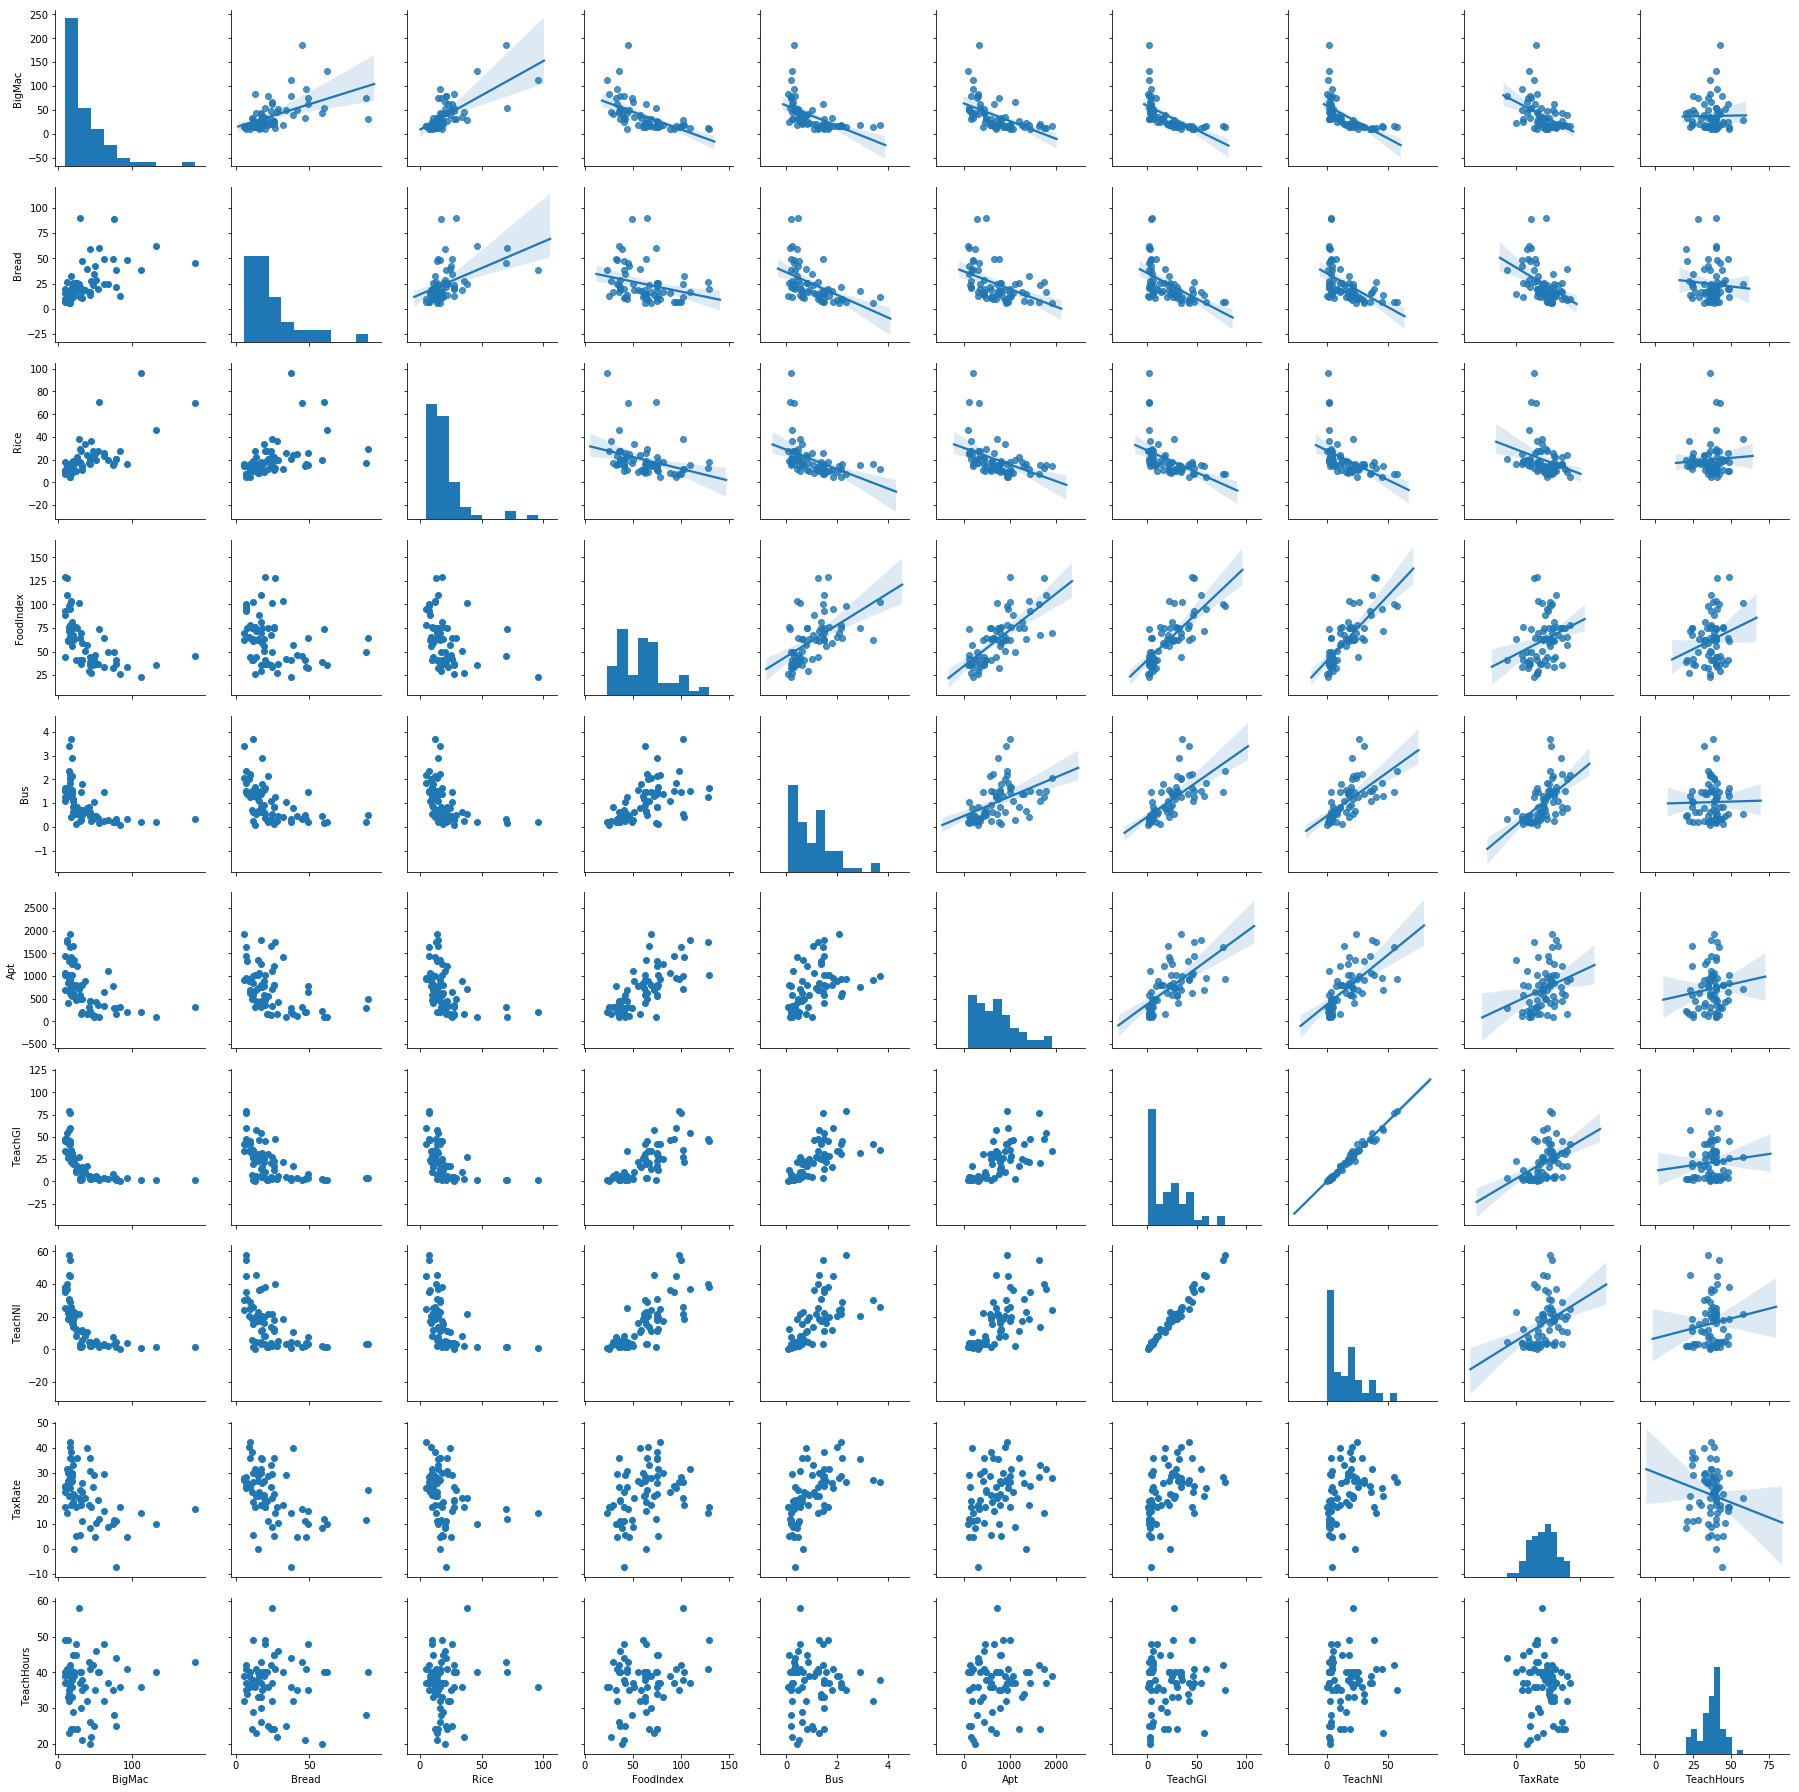

In [7]:
g = sns.PairGrid(mcdo)
g.map_upper(sns.regplot) 
g.map_lower(plt.scatter)
g.map_diag(plt.hist)  
plt.show()

## Standardisation des données
Dans l’analyse en composantes principales, les variables sont souvent normalisées. Ceci est particulièrement recommandé lorsque les variables sont mesurées dans différentes unités (par exemple: kilogrammes, kilomètres, centlitres, ... ); sinon, le résultat de l’ACP obtenue sera fortement affecté.  

L’objectif est de rendre les variables comparables. Généralement, les variables sont normalisées de manière à ce qu’elles aient au final :  
1. un écart type égal à un et  
2. une moyenne égale à zéro.  

Techniquement, l’approche consiste à transformer les données en soustrayant à chaque valeur une valeur de référence (la moyenne de la variable) et en la divisant par l’écart type. A l’issue de cette transformation les données obtenues sont dites données centrées-réduites. L’ACP appliquée à ces données transformées est appelée ACP normée.  

La standardisation des données est une approche beaucoup utilisée dans le contexte de l’analyse des données d’expression de gènes avant les analyses de type PCA et de clustering.  
  
Lors de la normalisation des variables, les données peuvent être transformées comme suit: $$z_{ij}=\frac{x_{ij}-mean(x_{j})}{sd(x_{j})}$$
Où $mean(x_{j})=\bar{x}_{j}=\frac{1}{n}\sum^{n}_{i=1}x_{ij}$ est la moyenne des valeurs de la variable $x_{j}$, et $sd(x_j)=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_{ij}-\bar{x}_{j})^{2}}$ est l’écart type (SD). 

Nous utilisons la classe _**StandardScaler**_ pour normaliser les données.  

**Avant cela nous allons exclure les variables qualitatives et convertir les variables quantitatives en float.**

In [8]:
X = mcdo

# Conversion des variables en float
# Les variables seront converties en float32
X = X.apply(pd.to_numeric,downcast='float',errors='ignore')
print("Après conversion\n",X.dtypes,"\n")
# Cast des variables en float32 vers float64
X = X.astype(dtype='float64')
print("Après cast de float32 à float64\n",X.dtypes,"\n")

Après conversion
 BigMac        float32
Bread         float32
Rice          float32
FoodIndex     float32
Bus           float32
Apt           float32
TeachGI       float32
TeachNI       float32
TaxRate       float32
TeachHours    float32
dtype: object 

Après cast de float32 à float64
 BigMac        float64
Bread         float64
Rice          float64
FoodIndex     float64
Bus           float64
Apt           float64
TeachGI       float64
TeachNI       float64
TaxRate       float64
TeachHours    float64
dtype: object 



In [9]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler

#instanciation
sc = StandardScaler()

#Avant normalisation on convertit toutes la variables float

#transformation - centrage-réducation
z = sc.fit_transform(X)
X = pd.DataFrame(z, index=X.index, columns=X.columns)
X.head()

,BigMac,Bread,Rice,FoodIndex,Bus,Apt,TeachGI,TeachNI,TaxRate,TeachHours
City,,,,,,,,,,
Amsterdam,-0.682073,-0.881315,-0.723418,0.162643,1.205754,0.384065,0.686046,0.337897,1.834445,0.307035
Athens,-0.521777,-0.711611,-0.062281,0.064309,-0.542189,-0.204834,-0.090231,0.008712,-0.295482,-1.051006
Auckland,-0.585895,-0.315634,-0.723418,-0.267568,0.665024,0.144143,0.040897,0.023024,0.522054,0.442840
Bangkok,0.407943,0.985433,0.334401,-0.636319,-0.718240,-1.295388,-0.892734,-0.842876,-1.635714,-0.236181
Barcelona,-0.489717,-0.315634,-0.657305,0.039725,-0.164935,-0.270268,0.224476,0.309273,-0.029873,0.307035


Examinons de nouveau les données en regardant les moyennes et les écarts-types.

In [10]:
X.describe()

,BigMac,Bread,Rice,FoodIndex,Bus,Apt,TeachGI,TeachNI,TaxRate,TeachHours
count,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01
mean,4.062773e-17,8.286447e-17,1.609019e-18,-1.190674e-16,1.609019e-18,-3.218038e-17,-4.827057e-18,2.735332e-17,-1.415937e-16,-9.975917e-17
std,1.007326e+00,1.007326e+00,1.007326e+00,1.007326e+00,1.007326e+00,1.007326e+00,1.007326e+00,1.007326e+00,1.007326e+00,1.007326e+00
min,-8.744290e-01,-1.051020e+00,-9.878733e-01,-1.574587e+00,-1.196095e+00,-1.360821e+00,-1.081558e+00,-1.093344e+00,-2.817400e+00,-2.273243e+00
25%,-6.820732e-01,-6.550426e-01,-5.250772e-01,-8.493757e-01,-8.565668e-01,-8.591666e-01,-8.979791e-01,-8.858137e-01,-6.341205e-01,-5.077894e-01
50%,-3.935395e-01,-3.156338e-01,-2.606223e-01,2.743365e-02,-2.655357e-01,-3.034584e-02,-1.793982e-01,-2.274428e-01,2.516591e-02,1.712313e-01
75%,3.438244e-01,1.934794e-01,1.360601e-01,5.477834e-01,5.644229e-01,5.149310e-01,5.811437e-01,4.810214e-01,7.165799e-01,4.428396e-01
max,4.735948e+00,3.700704e+00,5.028476e+00,2.764390e+00,3.343527e+00,2.652416e+00,3.004388e+00,2.992849e+00,2.041815e+00,2.887314e+00


# ACP avec Scikit Learn

In [11]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation
acp = PCA(svd_solver = 'full')

#affichage des paramètres
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)


Le paramètre ***(svd_solver = ‘full’)*** indique l’algorithme utilisé pour la décomposition en
valeurs singulières. Nous choisissons la méthode ‘’exacte’’, sélectionnée de toute manière par
défaut pour l’appréhension des bases de taille réduite.  

D’autres approches sont disponibles
pour le traitement des grands ensembles de données. Le nombre de composantes (K) n’étant
pas spécifié (n_components = None), il est par défaut égal au nombre de variables (K = p).  
Nous pouvons lancer les traitements dans un second temps. La fonction ***fit_transform()***
renvoie en sortie les coordonnées factorielles $F_{ik}$ que nous collectons dans la variable coord. Nous affichons le nombre de composantes générées (K), il est bien égal à p = 10.

In [12]:
#calculs
coord = acp.fit_transform(z)

#nombre de composantes calculées
print(acp.n_components_)

10


### Valeurs propres et scree plot

La propriété **.explained_variance_** semble faire l’affaire pour obtenir les variances
(valeurs propres, $λ_{k}$) associées aux axes factoriels.

In [13]:
#variance expliquée
print(acp.explained_variance_)

[5.43783801e+00 1.33855617e+00 8.34946366e-01 8.01252999e-01
 5.30237340e-01 4.66594603e-01 3.38215247e-01 2.69523580e-01
 1.26125397e-01 3.76910852e-03]


On ne retrouve pas les même valeurs que sous **R**, il faut appliquer une petite correction.

In [14]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[5.35902876e+00 1.31915681e+00 8.22845694e-01 7.89640636e-01
 5.22552741e-01 4.59832362e-01 3.33313577e-01 2.65617441e-01
 1.24297492e-01 3.71448376e-03]


On aurait pu obtenir directement les bonnes valeurs propres en passant par les valeurs singulières **.singular_values_** issues de la factorisation de la matrice des données centrées et réduites

In [15]:
#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)

[5.35902876e+00 1.31915681e+00 8.22845694e-01 7.89640636e-01
 5.22552741e-01 4.59832362e-01 3.33313577e-01 2.65617441e-01
 1.24297492e-01 3.71448376e-03]


PCA fournit également les proportions de variance associées aux axes. Il n’est pas nécessaire
d’effectuer une correction dans ce cas.

In [16]:
#proportion de variance expliquée
print("proportion de variance expliquée\n",acp.explained_variance_ratio_)
print("\n% de variances expliquer par les 5 premières variables")
print(acp.explained_variance_ratio_[0]+acp.explained_variance_ratio_[1]\
      +acp.explained_variance_ratio_[2]+acp.explained_variance_ratio_[3]\
      +acp.explained_variance_ratio_[4])

proportion de variance expliquée
 [5.35902876e-01 1.31915681e-01 8.22845694e-02 7.89640636e-02
 5.22552741e-02 4.59832362e-02 3.33313577e-02 2.65617441e-02
 1.24297492e-02 3.71448376e-04]

% de variances expliquer par les 5 premières variables
0.8813224643880584


La première composante accapare 53.60% de l’information disponible. Les 5 premières variables (**BigMac, Bread, Rice, FoodIndex, Bus**).  
Nous disposons des éléments permettant de construire le graphique "Scree plot" (éboulis des valeurs propres) (Figure 2).

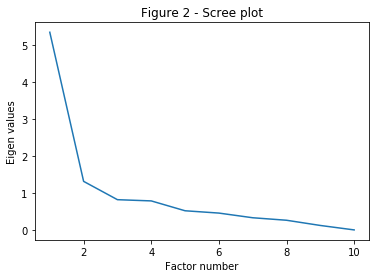

In [17]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Figure 2 - Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

Le graphique du cumul de variance restituée selon le nombre de facteurs peut être
intéressant également (Figure 3).

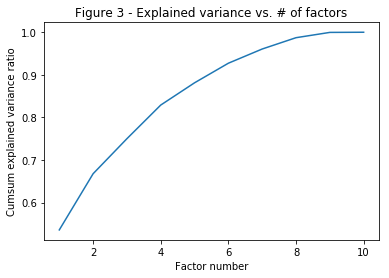

In [18]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Figure 3 - Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

### Détermination du nombre de facteur  à retenir
Les "cassures" dans les graphiques ci-dessus (Figure 2, Figure 3) sont souvent évoquées
(règle du coude) pour identifier le nombre de facteurs K* à retenir. La solution (K* = 2)
semble s’imposer ici.  

D’autres pistes existent pour répondre à cette question toujours délicate qui conditionne
l’interprétation de l’ACP, notamment le « test des bâtons brisés » de Legendre & Legendre(1983).  
Les seuils sont définis par : $$b_{k}=\sum^{p}_{m=k}\frac{1}{m}$$
Le facteur n°k est validé si $(λ_{k}>b_{k})$, où $λ_{k}$ est la valeur propre associée à l’axe n°k.  

Calculons ces seuils : 

In [19]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(1,p+1)
bs = np.cumsum(bs)
bs = bs[0]

Puis affichons conjointement les valeurs propres et les seuils :

In [20]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre  Seuils
0    5.359029     1.0
1    1.319157     1.0
2    0.822846     1.0
3    0.789641     1.0
4    0.522553     1.0
5    0.459832     1.0
6    0.333314     1.0
7    0.265617     1.0
8    0.124297     1.0
9    0.003714     1.0


Avec cette procédure, seul le premier facteur est valide. Le cercle des corrélations que nous
construirons par la suite (Figure 5) semble aller dans le même sens.  

Néanmoins, par commodité (pas seulement en réalité, cette étude est plus subtile qu’elle n’en a l’air, nous choisissons K* = 2 pour pouvoir représenter les individus et les
variables dans le plan.

### Représentation des individus – Outils pour l’interprétation
Coordonnées factorielles. Les coordonnées factorielles ($F_{ik}$) des individus ont été
collectées dans la variable **coord** (Section 3.3.1). Nous les positionnons dans le premier plan factoriel avec leurs labels pour situer et comprendre les proximités entre les véhicules.  


Je ferai deux commentaires au préalable :  

1. L’ajout d’une étiquette dans un graphique nuage de points n’est pas très pratique sous Python (librairie Matplotlib), ma solution a le mérite de fonctionner, je ne sais pas s’il y a plus simple (j’ai cherché pourtant).


2. Les outils graphiques calculent souvent automatiquement les échelles en fonction des plages de valeurs. Ce n’est pas une bonne idée en ce qui concerne l’ACP. En effet, les axes n’ont pas la même importance (% de variance restituée). Pour ne pas fausser la perception des proximités, il est très important de veiller à ce que les échelles soient identiques en abscisse et en ordonnée. Respecter cette règle nous dispense de faire afficher les pourcentages de variance portés par les axes. Nous nous rendons compte directement dans notre graphique que les dispersions des individus sont nettement plus marquées sur le premier axe, en abscisse (Figure 4).

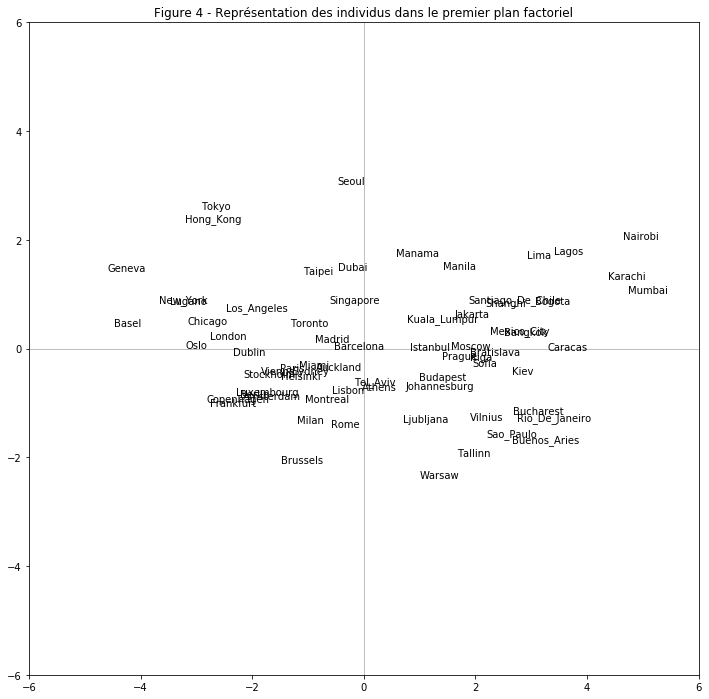

In [21]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée

#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
    
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
# ajout du titre
plt.title("Figure 4 - Représentation des individus dans le premier plan factoriel")
#affichage
plt.show()

#### Qualité de représentation – Les ${\cos^{2}}$ (cosinus carré). 
Pour calculer la qualité de représentation des individus sur les axes, nous devons d’abord calculer les carrés des distances à l’origine des individus, qui correspondent également à leur contribution dans l’inertie totale. $$d^{2}_{i}=\sum^{p}_{j=1}z^{2}_{ij}$$

In [22]:
#contribution des individus dans l'inertie totale
di = np.sum(z**2,axis=1)
print(pd.DataFrame({'ID':X.index,'d_i':di}))

                   ID        d_i
0           Amsterdam   7.437368
1              Athens   2.322722
2            Auckland   1.971709
3             Bangkok   8.086880
4           Barcelona   1.114525
5               Basel  25.646006
6              Berlin   7.821026
7              Bogota  12.971844
8          Bratislava   4.890904
9            Brussels   7.898610
10          Bucharest  11.179346
11           Budapest   4.160065
12       Buenos_Aries  11.916827
13            Caracas  21.154843
14            Chicago  10.854057
15         Copenhagen  10.618668
16              Dubai   7.609229
17             Dublin   6.413068
18          Frankfurt  13.923234
19             Geneva  26.092601
20           Helsinki   3.943845
21          Hong_Kong  19.176009
22           Istanbul   2.241653
23            Jakarta   6.347321
24       Johannesburg   3.006511
25            Karachi  24.218974
26               Kiev   9.964277
27       Kuala_Lumpur   5.247486
28              Lagos  22.221993
29        

Nous pouvons alors déduire la qualité de représentation des individus sur l’axe n°k avec :
$$\cos^{2}_{ik}=\frac{F^{2}_{ik}}{d_{i}^{2}}$$

In [23]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p-1):
    cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

                   id    COS2_1    COS2_2
0           Amsterdam  0.625761  0.116406
1              Athens  0.000332  0.255047
2            Auckland  0.368735  0.081200
3             Bangkok  0.778829  0.007249
4           Barcelona  0.252413  0.000041
5               Basel  0.781904  0.006372
6              Berlin  0.632467  0.102443
7              Bogota  0.729809  0.050885
8          Bratislava  0.740107  0.002784
9            Brussels  0.280066  0.565424
10          Bucharest  0.643276  0.128747
11           Budapest  0.234881  0.080571
12       Buenos_Aries  0.588784  0.251607
13            Caracas  0.510472  0.000068
14            Chicago  0.920826  0.018903
15         Copenhagen  0.747502  0.092091
16              Dubai  0.027973  0.274852
17             Dublin  0.855249  0.002508
18          Frankfurt  0.544657  0.080162
19             Geneva  0.805899  0.077983
20           Helsinki  0.552041  0.080763
21          Hong_Kong  0.537774  0.285809
22           Istanbul  0.312493  0

Les $\cos^{2}$ pour les deux premiers facteurs sont affichés. Conformément à la théorie, pour chaque individu, la somme des $\cos^{2}$ sur l’ensemble des facteurs est égale à 1. 
$$\sum^{p}_{k=1}\cos^{2}_{ik}=1$$

In [24]:
#vérifions la théorie - somme en ligne des cos2 = 1
print(np.sum(cos2,axis=1))

[1.00862165 1.00010389 1.00082883 1.00420275 1.00015746 1.00082652
 1.01048173 1.00061373 1.00008257 1.0058893  1.00158729 1.00258806
 1.00010425 1.00001702 1.00000011 1.03455486 1.00856204 1.00000061
 1.00268074 1.00995211 1.00015307 1.01728649 1.00006198 1.00381699
 1.00041678 1.00001535 1.00001547 1.0000803  1.00718154 1.01368063
 1.00152992 1.00045504 1.00013069 1.00094277 1.00088443 1.01015249
 1.00066833 1.00127526 1.00013321 1.00052753 1.00145955 1.00002206
 1.00018569 1.01172715 1.00000733 1.00221762 1.01909298 1.00129232
 1.00011742 1.00039026 1.00123461 1.00208894 1.00000032 1.00031982
 1.00146624 1.00003797 1.00145182 1.00026163 1.0001831  1.0005775
 1.00021535 1.00001638 1.0062769  1.00021955 1.008286   1.00000199
 1.000307   1.0054141  1.00928747]


#### Contribution des individus aux axes (CTR). 
Elles permettent de déterminer les individus qui pèsent le plus dans la définition de chaque facteur. $$CTR_{ik}=\frac{F^{2}_{ik}}{n\times\lambda_{k}}$$

In [25]:
#contributions aux axes
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])
print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

                   id     CTR_1         CTR_2
0           Amsterdam  0.012586  9.511513e-03
1              Athens  0.000002  6.508360e-03
2            Auckland  0.001966  1.758944e-03
3             Bangkok  0.017033  6.440751e-04
4           Barcelona  0.000761  5.025930e-07
5               Basel  0.054230  1.795310e-03
6              Berlin  0.013377  8.802393e-03
7              Bogota  0.025602  7.251779e-03
8          Bratislava  0.009789  1.496050e-04
9            Brussels  0.005982  4.906588e-02
10          Bucharest  0.019448  1.581277e-02
11           Budapest  0.002642  3.682435e-03
12       Buenos_Aries  0.018975  3.294108e-02
13            Caracas  0.029204  1.583175e-05
14            Chicago  0.027029  2.254132e-03
15         Copenhagen  0.021466  1.074342e-02
16              Dubai  0.000576  2.297704e-02
17             Dublin  0.014833  1.767112e-04
18          Frankfurt  0.020508  1.226206e-02
19             Geneva  0.056867  2.235497e-02
20           Helsinki  0.005888  3

On voit que Geneva, Basel, Nairobi sont relativement déterminants pour le premier axe; pour le second Brussels, Hong Kong et Warsaw.  

Les sommes en ligne sont égales à l’unité ici :
$$\sum^{n}_{i=1}CTR_{ik}=1$$

In [26]:
#vérifions la théorie
print(np.sum(ctr,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Représentation des variables – Outils pour l’aide à l’interprétation
Nous avons besoin des vecteurs propres pour l’analyse des variables. Ils sont fournis par le
champ **.components_**

In [27]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 3.46674765e-01  2.90131511e-01  2.83299743e-01 -3.42929401e-01
  -3.39122374e-01 -3.32207857e-01 -3.97749168e-01 -3.90091415e-01
  -2.45810922e-01 -4.02023478e-02]
 [ 1.65523187e-01  1.83728995e-01  2.34471434e-01  3.51848517e-01
  -1.37561241e-01  2.00615246e-01  1.16642957e-01  1.80729313e-01
  -4.38443838e-01  6.80000194e-01]
 [ 3.58752181e-01  2.23953095e-01  6.50239050e-01  1.96355081e-01
   2.83001889e-01 -4.56090819e-02  1.88254584e-01  1.31834183e-01
   4.34260879e-01 -1.90270690e-01]
 [-6.60964122e-02  5.34580824e-01 -1.37583507e-01  2.79723780e-01
  -1.89275681e-01  2.31053469e-01  9.53632354e-02  1.45116847e-01
  -3.46916311e-01 -6.10708630e-01]
 [-2.78076240e-01  6.42171366e-01 -2.83040849e-01  1.88082962e-01
   2.35597214e-01 -2.38592230e-01 -1.66771070e-01 -2.14081845e-01
   3.33039982e-01  3.12746964e-01]
 [-1.50716727e-01 -5.19290113e-02  1.77688996e-01  1.55709750e-01
  -3.69362989e-01  6.56646888e-01 -3.11857321e-01 -3.38012023e-01
   3.72909838e-01  2.42058654e-02

**Attention, par rapport à R, les facteurs sont en ligne, les variables en colonne**.  
Nous devons en tenir compte pour obtenir les corrélations (variables $x$ facteurs, $r_{jk}$)
en les multipliant par la racine carrée des valeurs propres :

In [28]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))

for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 8.02537388e-01  1.90110915e-01  3.25427126e-01 -5.87344128e-02
  -2.01015223e-01 -1.02202430e-01  2.65631507e-01 -2.68664484e-01
  -1.29786697e-01 -1.13572473e-03]
 [ 6.71642151e-01  2.11021114e-01  2.03149739e-01  4.75037747e-01
   4.64211614e-01 -3.52135509e-02  3.44258887e-02 -8.32643612e-02
   1.12183650e-01 -7.40735951e-04]
 [ 6.55826897e-01  2.69301115e-01  5.89837320e-01 -1.22259079e-01
  -2.04604030e-01  1.20492579e-01 -1.41946425e-01  2.24442013e-01
   8.72253405e-02  3.30002041e-04]
 [-7.93867028e-01  4.04114037e-01  1.78115348e-01  2.48567379e-01
   1.35961053e-01  1.05588246e-01 -8.86646246e-02  1.07220106e-01
  -2.52906320e-01  1.64584174e-03]
 [-7.85053923e-01 -1.57995347e-01  2.56713398e-01 -1.68193637e-01
   1.70308065e-01 -2.50468516e-01  3.53375332e-01  2.17498789e-01
   2.48157533e-02 -1.39819042e-03]
 [-7.69047109e-01  2.30415742e-01 -4.13723824e-02  2.05318101e-01
  -1.72473097e-01  4.45278429e-01  2.66967730e-01 -4.07422797e-02
   1.03229685e-01 -1.23359352e-04

Comme on peut le voir les variables sont maintenant en ligne, les facteurs en colonne.  

Si l’on s’en tient spécifiquement aux deux premiers facteurs :

In [29]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

           id     COR_1     COR_2
0      BigMac  0.802537  0.190111
1       Bread  0.671642  0.211021
2        Rice  0.655827  0.269301
3   FoodIndex -0.793867  0.404114
4         Bus -0.785054 -0.157995
5         Apt -0.769047  0.230416
6     TeachGI -0.920772  0.133970
7     TeachNI -0.903045  0.207576
8     TaxRate -0.569042 -0.503573
9  TeachHours -0.093067  0.781011


**Les signes sont opposés par rapport à R**. Mais ce n’est pas un problème, ce sont les concomitances et oppositions qui comptent. De ce point de vue, les résultats sont complètement cohérents.  

Nous pouvons dessiner maintenant le cercle des corrélations (Figure 5).

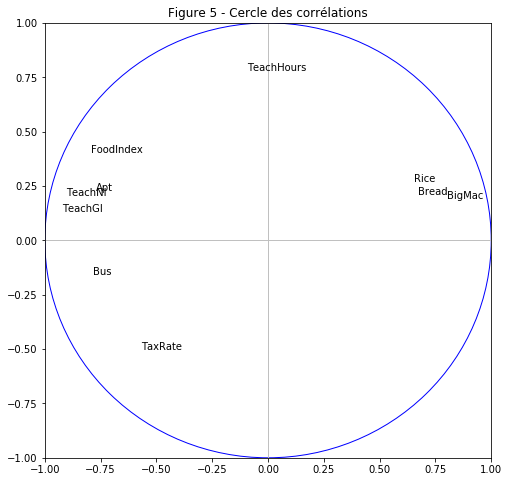

In [30]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#ajout d'un titre
plt.title("Figure 5 - Cercle des corrélations")

#affichage
plt.show()

On perçoit clairement l’effet TeachGI, TeachM et BigMac sur le premier axe, TeachGI, TeachM corrélées négativement par rapport à BigMac : Les personnes cultivées consomment moins de BigMac.

#### Qualité de représentation des variables ($\cos^{2}$)
On peut calculer la qualité de représentation des variables en montant la corrélation au carré :
$$\cos^{2}_{jk}=r^{jk}_{2}$$

In [31]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

           id    COS2_1    COS2_2
0      BigMac  0.644066  0.036142
1       Bread  0.451103  0.044530
2        Rice  0.430109  0.072523
3   FoodIndex  0.630225  0.163308
4         Bus  0.616310  0.024963
5         Apt  0.591433  0.053091
6     TeachGI  0.847822  0.017948
7     TeachNI  0.815490  0.043088
8     TaxRate  0.323809  0.253585
9  TeachHours  0.008661  0.609978


La somme des $\cos^{2}$ en ligne est égale à 1 (la somme des COS2 d’une variable sur l’ensemble des facteurs est égale à 1; $\sum^{p}_{k=1}\cos^{2}_{jk}=1$).

#### Contribution des variables aux axes (CTR). 
La contribution est également basée sur le carré de la corrélation, mais relativisée par l’importance de l’axe $$CTR_{jk}=\frac{r^{2}_{jk}}{\lambda_{k}}$$

In [32]:
#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]

#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

           id     CTR_1     CTR_2
0      BigMac  0.120183  0.027398
1       Bread  0.084176  0.033756
2        Rice  0.080259  0.054977
3   FoodIndex  0.117601  0.123797
4         Bus  0.115004  0.018923
5         Apt  0.110362  0.040246
6     TeachGI  0.158204  0.013606
7     TeachNI  0.152171  0.032663
8     TaxRate  0.060423  0.192233
9  TeachHours  0.001616  0.462400
